In [1]:
import requests
 

#Machine learning related imports 

import tensorflow as tf
import numpy as np
from tensorflow import keras
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import(Dense, Dropout, Activation, Flatten)
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import matplotlib.pyplot as plt

#To perform Http requests to update data 
import requests
#The key in the key-value pair aka dictionary must be equal to the name/id field of
#the model in django in models.py; in this case it is just "name". Any string that does
#not designate the title of a django model field will return a 400 error response code.
#201 means that post request to database thru API endpoint was successful
# r = requests.post('http://127.0.0.1:8000/tests/', json={"name":  "Chungus"})
# r.status_code
#The key in the key-value pair aka dictionary must be equal to the name/id field of
#the model in django in models.py; in this case it is just "name". Any string that does
#not designate the title of a django model field will return a 400 error response code.
#201 means that post request to database thru API endpoint was successful
 

/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.8) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


In [2]:
#Load model 
model = keras.models.load_model("/home/dolan/Downloads/NattyOrNot/backend/machine_learning/.ipynb_checkpoints/nattyornot.h5")

model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_35 (Conv2D)          (None, 73, 73, 256)       2560      
                                                                 
 activation_48 (Activation)  (None, 73, 73, 256)       0         
                                                                 
 dropout_35 (Dropout)        (None, 73, 73, 256)       0         
                                                                 
 max_pooling2d_35 (MaxPoolin  (None, 24, 24, 256)      0         
 g2D)                                                            
                                                                 
 conv2d_36 (Conv2D)          (None, 22, 22, 256)       590080    
                                                                 
 activation_49 (Activation)  (None, 22, 22, 256)       0         
                                                     

In [3]:
#X_test.shape
input_data = np.zeros(196 * 75 * 75 * 1).reshape((196, 75, 75, 1))
input_data.shape

(196, 75, 75, 1)

In [4]:
input_data[0].shape

(75, 75, 1)

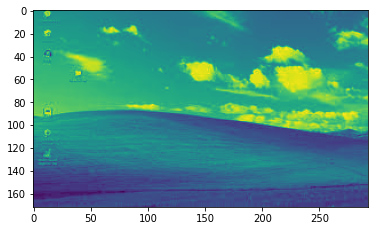

In [5]:
# Get the image
MEDIA = '/home/dolan/Downloads/NattyOrNot/backend/media/images/'

images_folder = os.listdir(MEDIA)
most_recent_upload_filename = images_folder.pop(0)
most_recent_upload = (MEDIA + most_recent_upload_filename)
most_recent_upload = cv2.imread(most_recent_upload,  cv2.IMREAD_GRAYSCALE)
#print(most_recent_upload)
plt.imshow(most_recent_upload)

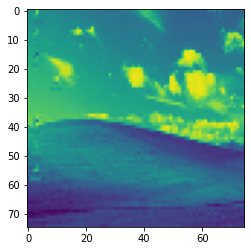

In [6]:
# Reshape the data
data = cv2.resize(most_recent_upload, (75, 75))
plt.imshow(data)

In [7]:
def predict(data, model):
    IMG_SIZE = model.layers[0].input_shape[1] #Get size of input layer
    resized_image = cv2.resize(data, (IMG_SIZE, IMG_SIZE))
    #data = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    data = np.expand_dims(data, axis=0)
    prediction_ = model.predict(data)
    print_statement = None
    if prediction_ >= 0.5:
        print_statement = "Natty"
    else:
        print_statement =  "Not"
    
    return float(prediction_)#, print_statement

result = predict(input_data[1], model)
result

0.39178943634033203

In [8]:
#Truncate to 2 decimal places...
result *= 10000 #multiply by 10000

result //= 1 #get the integer number of times it's divisible by 1
result /= 100 #divide by 100 to get the percentage
print(result)

39.17


In [10]:
#Post data to server
# r1 = requests.post('http://127.0.0.1:8000/predictions/', 
#                   json={"preds":  result[1], "probability": 0.3}
#                  )
r = requests.post('http://127.0.0.1:8000/predictions/', 
                  json={"preds": result}
                 )
r.status_code#, r2.status_code

201

In [137]:
import os
PROJECT_ROOT = os.getcwd()

In [138]:
folder = os.path.join(PROJECT_ROOT, '.ipynb_checkpoints/nattyornot.h5')

In [139]:
folder

'/home/dolan/Downloads/NattyOrNot/backend/machine_learning/.ipynb_checkpoints/nattyornot.h5'

In [144]:
PROJECT_ROOT +  '/backend/media/images/'

'/home/dolan/Downloads/NattyOrNot/backend/machine_learning/backend/media/images/'